In [1]:
# Practice 4-2 Linear Discriminant Analysis
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import os, sys
path = 'C:/Users/kh_le/Desktop/LGH/Yonsei Univ/Lecture/2019_01/Data Mining and Business Intelligence/Data'
os.chdir(path)
os.getcwd()

'C:\\Users\\kh_le\\Desktop\\LGH\\Yonsei Univ\\Lecture\\2019_01\\Data Mining and Business Intelligence\\Data'

In [4]:
# 1 DATA UNDERSTANDING
# READ DATA
df = pd.read_csv("cell_samples_string.csv", sep=",")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [5]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [6]:
# 2 DATA PRE-PROCESSING
# MISSING VALUES
df.isnull().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [7]:
# Statistics
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.577969,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.608431,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# Std.deviation<0.1

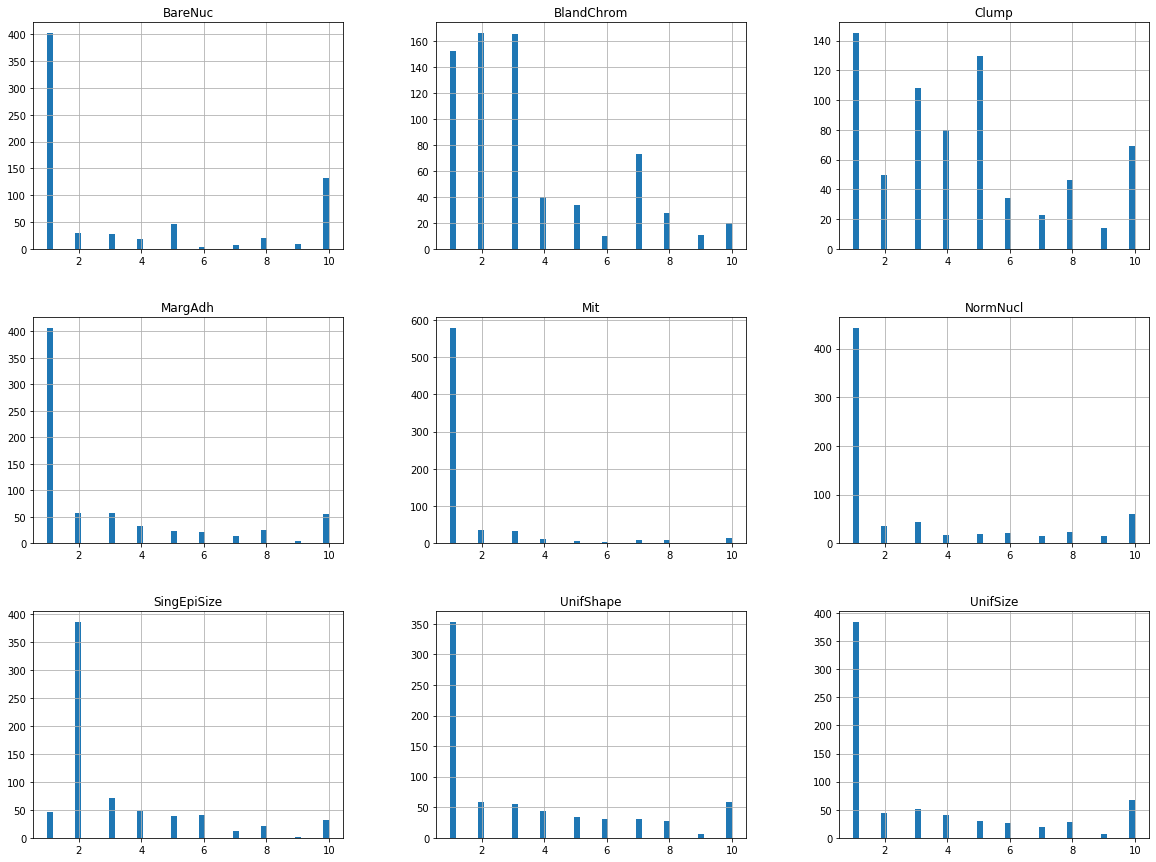

In [9]:
# histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# SKEWNESS
# Set the numeric_features
numeric_features = df.dtypes[df.dtypes != 'object'].index


# Check the skew of all numerical features 
# apply => axis 0: default, 0 or index, apply function to each column.
skewed_features = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False, axis=0) # ndarray
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' : skewed_features})
skewness


Skew in numerical features: 



,Skew
Mit,3.553012
SingEpiSize,1.708495
MargAdh,1.521195
NormNucl,1.419207
UnifSize,1.230489
UnifShape,1.159364
BlandChrom,1.097607
BareNuc,0.967676
Clump,0.591586


In [11]:
# Correlation
# UnifShape - UnifSize => 0.9
df.corr()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
Clump,1.000000,0.644913,0.654589,0.486356,0.521816,0.582805,0.558428,0.535835,0.350034
UnifSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.683438,0.755721,0.722865,0.458693
UnifShape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707278,0.735948,0.719446,0.438911
MargAdh,0.486356,0.705582,0.683079,1.000000,0.599599,0.660617,0.666715,0.603352,0.417633
SingEpiSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.576951,0.616102,0.628881,0.479101
BareNuc,0.582805,0.683438,0.707278,0.660617,0.576951,1.000000,0.673477,0.575955,0.334945
BlandChrom,0.558428,0.755721,0.735948,0.666715,0.616102,0.673477,1.000000,0.665878,0.344169
NormNucl,0.535835,0.722865,0.719446,0.603352,0.628881,0.575955,0.665878,1.000000,0.428336
Mit,0.350034,0.458693,0.438911,0.417633,0.479101,0.334945,0.344169,0.428336,1.000000


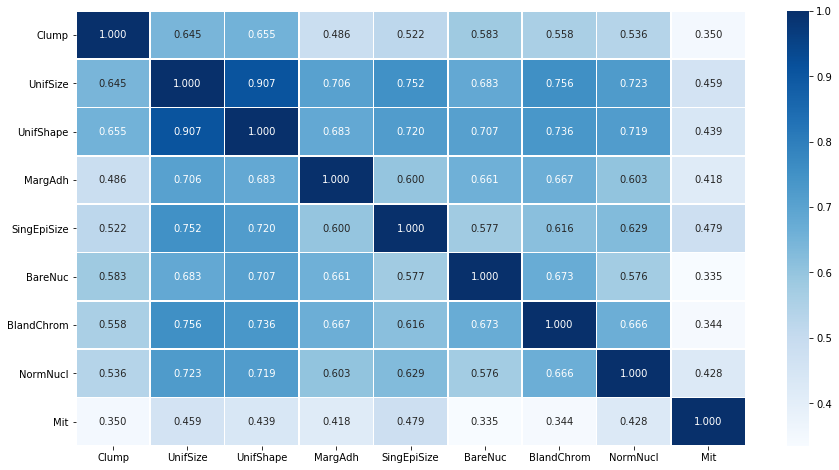

In [14]:
# Visual 01 - seaborn Heatmap
# Parameters
# data: rectangular dataset
# cmap: matplotlib colormap name or object, or list of colors, optional
# vmin, vmax: floats, optional, Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
# annot: bool, optional. If True and vmin or vamx are absent, the colormap range is computed with robust quantiles instead of the extreme values
# fmt: string, optional. String formatting code to use when adding annotations.
# linewidth: float, optional. Width of the lines that will divide each cell.
plt.figure(figsize=(15,8))
sns.heatmap(data = df.corr(), annot = True,
           fmt = '.3f', linewidth=.5, cmap='Blues')

In [16]:
df.Class

0         benign
1         benign
2         benign
3         benign
4         benign
         ...    
694       benign
695       benign
696    malignant
697    malignant
698    malignant
Name: Class, Length: 699, dtype: object

In [17]:
# Dummy
dummies = pd.get_dummies(df['Class'], drop_first=False)
df['Class'] = dummies
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


In [18]:
# P-Value Check!
# statsmodels packages: 
### test and estimation
### regression analysis
### time-series analysis


from patsy import dmatrices
import statsmodels.api as sm

In [19]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [20]:
features = "Clump+UnifSize+UnifShape+MargAdh+SingEpiSize+BareNuc+BlandChrom+NormNucl+Mit"

# Break into left and right hand side; y and X
y, X = dmatrices("Class~" +features, data=df, return_type="dataframe")

# Fit X to y
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     385.9
Date:                Sun, 31 May 2020   Prob (F-statistic):          2.84e-262
Time:                        19:31:26   Log-Likelihood:                 156.70
No. Observations:                 699   AIC:                            -293.4
Df Residuals:                     689   BIC:                            -247.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2558      0.017     75.867      

In [21]:
df_selected=df.drop(columns='UnifShape')
df_selected.head()

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,2,1,3,1,1,1
1,5,4,5,7,10,3,2,1,1
2,3,1,1,2,2,3,1,1,1
3,6,8,1,3,4,3,7,1,1
4,4,1,3,2,1,3,1,1,1


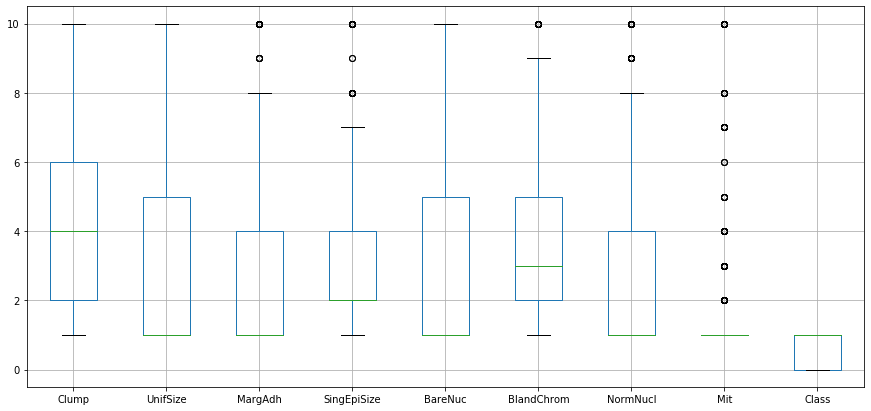

In [22]:
# Outliers
# Print Boxplot :)
plt.figure(figsize=(15,7))
df_selected.boxplot()

In [23]:
# Get IQR for each column.
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Clump          4.0
UnifSize       4.0
MargAdh        3.0
SingEpiSize    2.0
BareNuc        4.0
BlandChrom     3.0
NormNucl       3.0
Mit            0.0
Class          1.0
dtype: float64


In [24]:
df_selected.shape

(699, 9)

In [25]:
df_selected.head()

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,2,1,3,1,1,1
1,5,4,5,7,10,3,2,1,1
2,3,1,1,2,2,3,1,1,1
3,6,8,1,3,4,3,7,1,1
4,4,1,3,2,1,3,1,1,1


In [26]:
# remove ouliters based on Boxplot
df_outlier_remove = df_selected[~((df_selected < (Q1 - 1.5*IQR)) |  (df_selected > (Q3 + 1.5*IQR))).any(axis=1)]
df_outlier_remove.shape

(504, 9)

In [27]:
# delete outlier, using Z-score
plt.figure(figsize=(15,5))
df_outlier_remove_zscore = df_selected[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<Figure size 1080x360 with 0 Axes>

In [28]:
df_outlier_remove_zscore.shape

(648, 9)

In [29]:
# 3 MODELING
# Define X, y
X = df_outlier_remove_zscore.loc[:, df_outlier_remove_zscore.columns != 'Class'].values
y = df_outlier_remove_zscore.loc[:, df_outlier_remove_zscore.columns == 'Class'].values

In [30]:
# Model fit
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X,y)

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 1.17449068],
       [-2.53284105],
       [ 1.2483614 ],
       [-1.96404883],
       [ 1.31892055],
       [-5.77621056],
       [-0.69830606],
       [ 1.71826922],
       [ 1.78817066],
       [ 1.32065595],
       [ 1.96972004],
       [ 1.87300614],
       [-0.32019764],
       [ 1.32223211],
       [-4.28485482],
       [-0.47904367],
       [ 1.51048711],
       [ 1.35575019],
       [-3.9157154 ],
       [ 0.99323117],
       [-3.37714874],
       [-4.19805238],
       [ 1.69174662],
       [-1.94309746],
       [ 1.89952873],
       [-1.37941282],
       [ 1.57210677],
       [ 1.3292276 ],
       [ 1.87300614],
       [ 2.20900257],
       [ 1.76193794],
       [ 1.71826922],
       [-3.56826129],
       [ 1.69985439],
       [ 1.69174662],
       [ 1.87300614],
       [-3.54674177],
       [ 0.25464364],
       [-3.02656803],
       [-2.17103827],
       [-2.96526261],
       [-1.93444257],
       [-4.72215586],
       [-3.7288527 ],
       [ 1.99437255],
       [-3

In [31]:
axis0 = y.ravel()
axis0.shape

(648,)

In [32]:
lda.fit_transform(X,y).ravel().shape

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(648,)

In [33]:
lda.predict_proba(X)

array([[1.33258976e-05, 9.99986674e-01],
       [9.98715329e-01, 1.28467150e-03],
       [9.33162422e-06, 9.99990668e-01],
       ...,
       [9.99977441e-01, 2.25586604e-05],
       [9.99174163e-01, 8.25836656e-04],
       [9.99592396e-01, 4.07603547e-04]])

In [34]:
lda.score(X,y)

0.9583333333333334

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


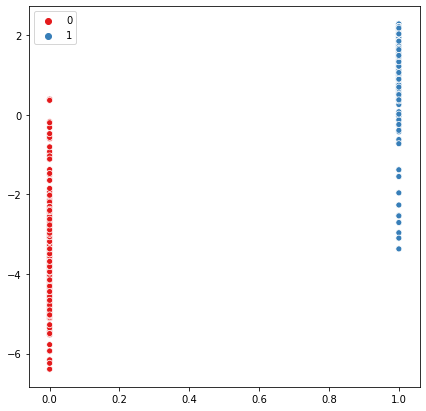

In [35]:
# Visual -2 Scatter Plot (seaborn)
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x = axis0, y = lda.fit_transform(X,y).ravel(), hue = (axis0),
                     palette = "Set1")

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


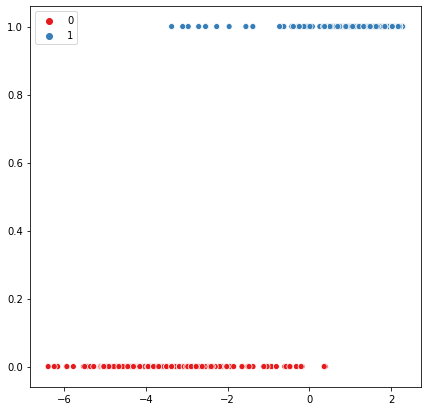

In [36]:
# Visual -2 Scatter Plot (seaborn)
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x = lda.fit_transform(X,y).ravel(), y = axis0, hue = axis0,
                     palette = "Set1")